## Figure S1

In [12]:
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
import sys
import os

# Get the absolute path to the project root (one directory up from notebooks/)
root_path = os.path.abspath("..")
sys.path.append(root_path)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src import figure_Tools as fT



# needed datasets
df_point = pd.read_pickle("../Data/Point_data.pkl")

# convert cable length to microns
df_point['Total_Cable'] = df_point['Total_Cable'] * 0.001

### Figure S1a

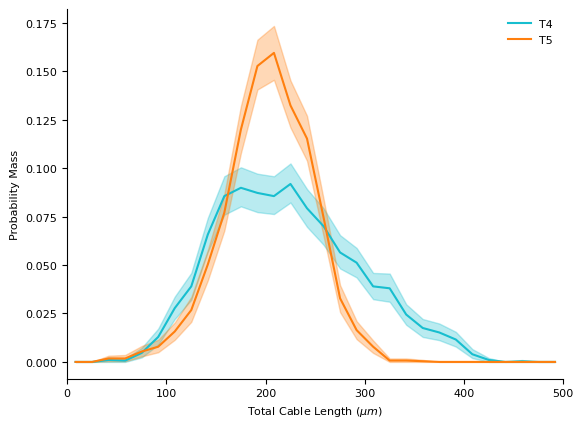

In [4]:
fig, ax = plt.subplots()

fT.point_value_PMF_df(
    ax,
    df=df_point,
    DV="Total_Cable",
    group_col="Type",
    groups=fT.Types,
    colours=fT.Type_colours,
    x0=0,
    x1=500,
    num_bins=30,
    num_bootstraps=1000,
    fill_kwargs = {'alpha': 0.3}
)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', labelsize=8)
ax.set_xlabel('Total Cable Length $(\mu m)$', fontsize = 8)
ax.set_ylabel('Probability Mass', fontsize = 8)
ax.legend(frameon = False, fontsize = 8)

### Figure S1b

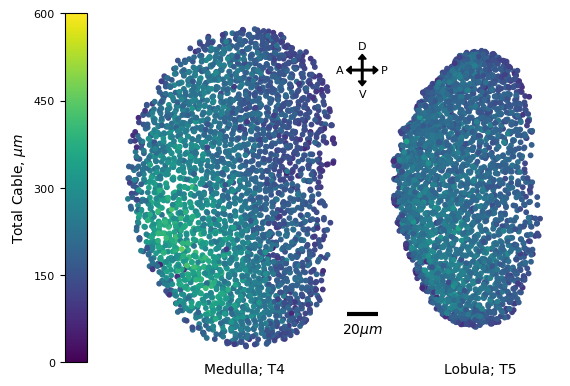

In [18]:
fig, ax = plt.subplots()

T4_coords = df_point.loc[df_point.Type == 'T4',['Root_x','Root_y']].values + np.array([-75,0])
T5_coords = df_point.loc[df_point.Type == 'T5',['Root_x','Root_y']].values + np.array([75,0])

ax.set_rasterized(True)
cmap = plt.cm.viridis
norm = mcolors.Normalize(vmin=0, vmax=600)

scatter = ax.scatter(
    T4_coords[:, 0],
    T4_coords[:, 1],
    c=df_point.loc[df_point.Type == "T4", "Total_Cable"],
    cmap=cmap,
    norm=norm,
    s = 10,
    # alpha = 0.3
)
ax.scatter(
    T5_coords[:, 0],
    T5_coords[:, 1],
    c=df_point.loc[df_point.Type == "T5", "Total_Cable"],
    cmap=cmap,
    norm=norm,
    s = 10,
    # alpha = 0.3
)
ax.hlines(-80, -10, 10, color="k", lw=3)

ax.text(0, -90,  r"$20\mu m$",ha = 'center', va = 'center', fontsize = 10)

# Create a divider for the existing axes instance
divider = make_axes_locatable(ax)

# Append a new axes to the left of the main axes.
# size="5%" makes the colorbar width 5% of the main axes' width.
# pad=0.1 creates a padding of 0.1 inches.
cax = divider.append_axes("left", size="5%", pad=0.2)

# Add the color bar to the new axes
cbar = plt.colorbar(scatter, cax=cax, location='left', ticklocation='left')


cbar.set_label(r"Total Cable, $\mu m$", fontsize=10)
# Customize the color bar ticks and labels
tick_labels = np.linspace(0, 600, num=5, endpoint=True)
cbar.set_ticks(ticks=tick_labels) # No need to set labels twice
cbar.set_ticklabels([f"{int(t)}" for t in tick_labels], fontsize=8)

# add compass
fT.ax_compass(ax,
            start_point = [0,75],
            arrow_length = 10,
            arrow_scale = 2,
            arrow_text = ['A','P','V','D'],
            arrow_props = {
                'head_width': 5,
                'head_length': 3,
                'width': 1,
                'length_includes_head': True,
                'zorder': 5
            },
            fontsize = 8
        )

ax.text(-75,-115, 'Medulla; T4', ha= 'center', va = 'center', fontsize = 10)
ax.text(75,-115, 'Lobula; T5', ha= 'center', va = 'center', fontsize = 10)

ax.axis("off")
ax.set_aspect("equal")



### Figure S1c

(0.0, 500.0)

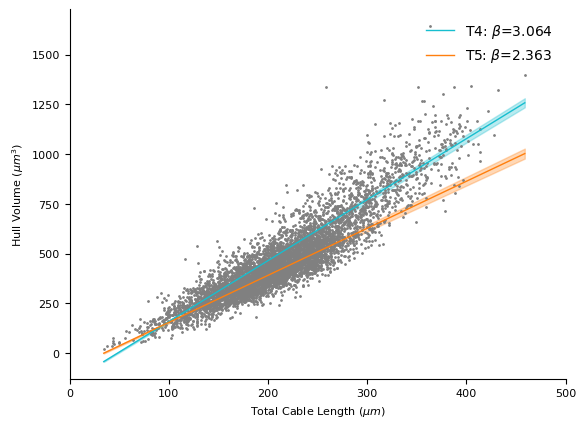

In [9]:
fig, ax = plt.subplots()

fT.regPlot(
    ax = ax,
    df = df_point,
    DV = 'Hull_volume',
    IV_col  = "Total_Cable",
    group_col = 'Type',
    groups = fT.Types,
    colours = fT.Type_colours,
    line_kwargs = {'linewidth':1},
    point_kwargs = {'s':1,'c':'gray'},
    fill_kwargs = {'alpha':0.3},
    legend_kwargs = {'frameon':False,'loc':"upper right"} ,
)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', labelsize=8)
ax.set_xlabel('Total Cable Length $(\mu m)$', fontsize=8)
ax.set_ylabel('Hull Volume $(\mu m^3)$', fontsize = 8)
ax.set_xlim([0,500])

### Figure S1d

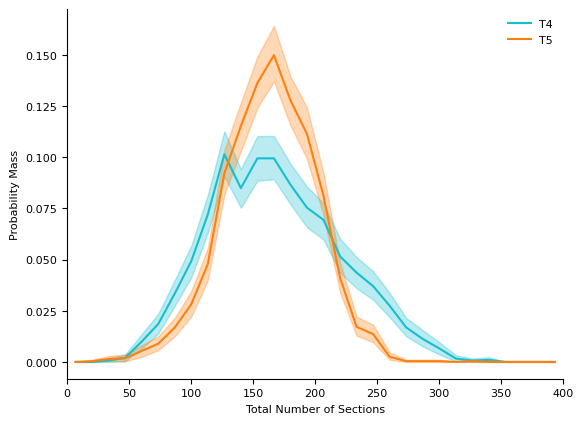

In [5]:
fig, ax = plt.subplots()

fT.point_value_PMF_df(
    ax,
    df=df_point,
    DV="Segment_Count",
    group_col="Type",
    groups=fT.Types,
    colours=fT.Type_colours,
    x0=0,
    x1=400,
    num_bins=30,
    num_bootstraps=1000,
    fill_kwargs = {'alpha': 0.3}
)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', labelsize=8)
ax.set_xlabel('Total Number of Sections', fontsize = 8)
ax.set_ylabel('Probability Mass', fontsize = 8)
ax.legend(frameon = False, fontsize = 8)

### Figure S1e

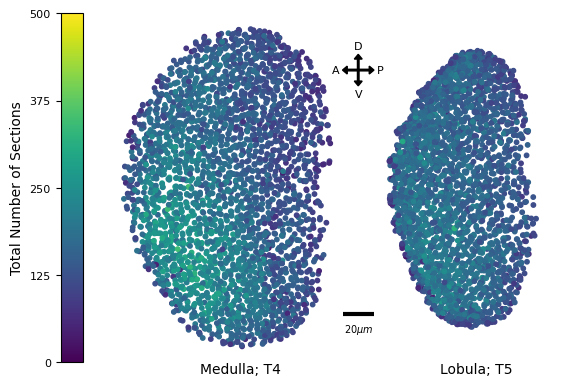

In [16]:
fig, ax = plt.subplots()

T4_coords = df_point.loc[df_point.Type == 'T4',['Root_x','Root_y']].values + np.array([-75,0])
T5_coords = df_point.loc[df_point.Type == 'T5',['Root_x','Root_y']].values + np.array([75,0])

ax.set_rasterized(True)
cmap = plt.cm.viridis
norm = mcolors.Normalize(vmin=0, vmax=500)

scatter = ax.scatter(
    T4_coords[:, 0],
    T4_coords[:, 1],
    c=df_point.loc[df_point.Type == "T4", "Segment_Count"],
    cmap=cmap,
    norm=norm,
    s = 10,
    # alpha = 0.3
)
ax.scatter(
    T5_coords[:, 0],
    T5_coords[:, 1],
    c=df_point.loc[df_point.Type == "T5", "Segment_Count"],
    cmap=cmap,
    norm=norm,
    s = 10,
    # alpha = 0.3
)
ax.hlines(-80, -10, 10, color="k", lw=3)

ax.text(0, -90,  r"$20\mu m$",ha = 'center', va = 'center', fontsize = 7)

# Create a divider for the existing axes instance
divider = make_axes_locatable(ax)

# Append a new axes to the left of the main axes.
# size="5%" makes the colorbar width 5% of the main axes' width.
# pad=0.1 creates a padding of 0.1 inches.
cax = divider.append_axes("left", size="5%", pad=0.2)

# Add the color bar to the new axes
cbar = plt.colorbar(scatter, cax=cax, location='left', ticklocation='left')


cbar.set_label("Total Number of Sections", fontsize=10)
# Customize the color bar ticks and labels
tick_labels = np.linspace(0, 500, num=5, endpoint=True)
cbar.set_ticks(ticks=tick_labels) # No need to set labels twice
cbar.set_ticklabels([f"{int(t)}" for t in tick_labels], fontsize=8)

# add compass
fT.ax_compass(ax,
            start_point = [0,75],
            arrow_length = 10,
            arrow_scale = 2,
            arrow_text = ['A','P','V','D'],
            arrow_props = {
                'head_width': 5,
                'head_length': 3,
                'width': 1,
                'length_includes_head': True,
                'zorder': 5
            },
            fontsize = 8
        )

ax.text(-75,-115, 'Medulla; T4', ha= 'center', va = 'center', fontsize = 10)
ax.text(75,-115, 'Lobula; T5', ha= 'center', va = 'center', fontsize = 10)

ax.axis("off")
ax.set_aspect("equal")

### Figure S1f

(0.0, 400.0)

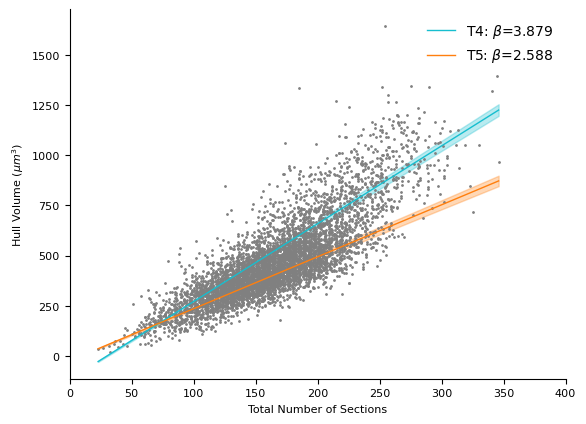

In [11]:
fig, ax = plt.subplots()

fT.regPlot(
    ax = ax,
    df = df_point,
    DV = 'Hull_volume',
    IV_col  = "Segment_Count",
    group_col = 'Type',
    groups = fT.Types,
    colours = fT.Type_colours,
    line_kwargs = {'linewidth':1},
    point_kwargs = {'s':1,'c':'gray'},
    fill_kwargs = {'alpha':0.3},
    legend_kwargs = {'frameon':False,'loc':"upper right"} ,
)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', labelsize=8)
ax.set_xlabel('Total Number of Sections', fontsize=8)
ax.set_ylabel('Hull Volume $(\mu m^3)$', fontsize = 8)
ax.set_xlim([0,400])